In [1]:
#!/usr/bin/env python
# encoding: utf-8
#from scipy.spatial.distance import cdist
from nltk import bigrams
import networkx as nx
#similarity score concat before fc1 
import tldextract
from itertools import combinations
from shutil import which
import torch.nn.functional as F
from statistics import mean


from gensim.models import KeyedVectors
from cleantext import clean
from tqdm import tqdm
from nltk.tokenize import TweetTokenizer
import preprocessor as p 
import numpy as np

import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import LongformerModel, LongformerTokenizer, LongformerConfig
from tqdm import tqdm
tqdm.pandas(desc="my bar!")
import pandas as pd 
import numpy as np 
from collections import defaultdict
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
#import wandb
#import numpy as np
from pprint import pprint


from nltk.corpus import stopwords
import preprocessor as p  #pip install tweet-preprocessor
import logging  # Setting up the loggings to monitor gensim
from nltk.stem import WordNetLemmatizer
from string import punctuation as punc

import gensim
import gensim.corpora as corpora
#from gensim.utils import simple_preprocess
import gensim.models as gsm



import emoji #pip install emoji --upgrade
# Internal dependencies


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import torchvision.transforms as transforms
from torch.autograd import Variable

import os
import torch.multiprocessing as mp
import torchvision.transforms as transforms


#os.environ['CUDA_VISIBLE_DEVICES'] = '1, 2, 3' 
#....to install apex...
#pip install -v --no-cache-dir ./

#!/usr/bin/env python
# encoding: utf-8
import time
import torch.optim as optim
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
#from torchnlp.nn import Attention #pip imstall pytorch-nlp

from gensim.models import KeyedVectors
#from fastnode2vec import Graph, Node2Vec
import pandas as pd
import networkx as nx
import os

from torch.utils.data import TensorDataset, random_split
from cleantext import clean
from tqdm import tqdm
from nltk.tokenize import TweetTokenizer
import preprocessor as p 
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import LongformerModel, LongformerTokenizer, LongformerConfig
from tqdm import tqdm
tqdm.pandas(desc="my bar!")
import pandas as pd 
import numpy as np 
from collections import defaultdict

from sklearn.model_selection import train_test_split
import datetime
import matplotlib.pyplot as plt
import time
#import numpy as np
from pprint import pprint

from nltk.corpus import stopwords
import preprocessor as p  #pip install tweet-preprocessor
import logging  # Setting up the loggings to monitor gensim
from nltk.stem import WordNetLemmatizer
from string import punctuation as punc

import gensim
import gensim.corpora as corpora
#from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.models as gsm
from gensim.test.utils import datapath

import regex 
#pip install emoji --upgrade
# Internal dependencies



import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import torchvision.transforms as transforms
from torch.autograd import Variable

import os
import torch.multiprocessing as mp
import torchvision.transforms as transforms
import torch.distributed as dist

from urllib.parse import urlparse
import tldextract

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds

In [4]:
#os.environ['CUDA_VISIBLE_DEVICES'] = '1, 2, 3' 
#....to install apex...
#pip install -v --no-cache-dir ./
from nltk import bigrams
import networkx as nx
def extract_domain(x):
    '''
    e.g. x='http://www.bbc.co.uk'
    '''
    ext = tldextract.extract(x)
    return ext.registered_domain

def retrieveRTMT(_df,n2vRT):
    '''
    #_names: nodes' name in RT or MT network
    '''
    
    dfRT=pd.DataFrame(n2vRT.vectors,index=n2vRT.index_to_key)
    #dfMT=pd.DataFrame(n2vMT.wv.vectors,index=n2vMT.wv.index2entity)
    RT=dfRT[dfRT.index.isin(_df['user_screen_name'])].values
    #MT=dfMT[dfMT.index.isin(_df['user_screen_name'])].values
    
    
    #RT=torch.tensor(RT)
    #MT=torch.tensor(MT)
    return RT#, MT

def prepro(ndf,col):
    
    import re
    def remove_rt(query):
        query=re.sub(r"\brt", "", query)
        return query
    ndf[col]=ndf[col].progress_apply(lambda x: remove_rt(x))

    def tokenizer(_text):
        return TweetTokenizer().tokenize(_text)

    ndf[col]=ndf[col].progress_apply(lambda x:tokenizer(x))

    from nltk.corpus import stopwords
    STOPWORDS=stopwords.words('english')
    def remove_stop(_text):
        return ' '.join([x for x in _text if x not in STOPWORDS])

    ndf[col]=ndf[col].progress_apply(lambda x: remove_stop(x))
    
    def preprocessing(string): 

        text=clean(string,lower=True, no_emails=True,no_numbers=True,no_punct=True,no_digits=False,no_currency_symbols=True,
                   replace_with_number="",
                   no_urls=True,replace_with_url="",
                   replace_with_email="",
                   replace_with_currency_symbol="")

        return text
    ndf[col]=ndf[col].progress_apply(lambda x: preprocessing(x))
    
    def remove_emoji(string):
        p.set_options(p.OPT.EMOJI, p.OPT.SMILEY)
        
        return p.clean(string)
    ndf[col]=ndf[col].progress_apply(lambda x: remove_emoji(x))
    
    ndf.reset_index(inplace=True,drop=True)
    return ndf

torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.enabled = False
np.random.seed(1)


def makefolder(save):
    if  os.path.exists(save) == False:
        os.makedirs(save)
    else:
        print('Floder:',save,'Exsit!')
    return save
def get_intersection(_df,_intersecion):
    for each  in ['source','target']:

        _df=_df[_df[each].isin(_intersecion)]
    return _df

def fast_node2vec(_df,_save,_file,saving_name,epochs):
    '''
    _df:retweetdf,mentiondf
    _save:saving folder path
    _file:csv name, e.g., vaccine, mask
    saving_name: RT or MT
    '''
    
    _tuples=_df.to_records(index=False)

    _lst=list(_tuples)

    _graph = Graph(_lst, directed=True, weighted=True)

    _n2v = Node2Vec(_graph, dim=300, walk_length=100, context=10, p=2.0, q=0.5, workers=-1)
    
    _n2v.train(epochs=epochs)

    _n2v.wv.save(_save+_file+'_'+saving_name+'.wv')
    return _n2v

def updatecol(df1,df2,colname,index):
    df1[colname]=''

    df1.set_index(index,inplace=True)

    df2.set_index(index,inplace=True)

    df1.update(df2)

    df1.reset_index(inplace=True)
    df2.reset_index(inplace=True)
    return df1

def updatecol_seperate(df1,df2,colname,index1,index2):
    df1[colname]=''

    df1.set_index(index1,inplace=True)

    df2.set_index(index2,inplace=True)

    df1.update(df2)

    df1.reset_index(inplace=True)
    df2.reset_index(inplace=True)
    return df1



def preproNetwork(_df,nettype,topn,Need,_name):
    '''
    target: 'retweeted_status_screen_name' or 'user_mentions_screen_names'
    return topn indegree dataframe
    _name: QAnon or Biden
    '''
    if nettype=='RT':
        target= 'retweeted_status_screen_name' 
    elif nettype=='MT':
        target= 'user_mentions_screen_names'
        
    file=_name
    save='../Project2/'+file+'_data_processed/'
    makefolder(save)
        
    #_df=_df.rename(columns={'user_screen_name':'users'})
    _df=_df[['user_screen_name',target]]
    _df.dropna(subset=[target],inplace=True)
    _df[target]=_df[target].str.replace('\'','')
    _df[target]=_df[target].apply(lambda x: x.split(','))
    _df=_df.explode([target])
    _df=_df[['user_screen_name',target]]
    #_df.columns=['source','target']
    
    
    _df=_df.explode([target])
    
    G=nx.from_pandas_edgelist(_df,source='user_screen_name',target=target,create_using=nx.DiGraph())

    nx.write_gexf(G, save+nettype+ '.gexf')
    mdf=pd.DataFrame(G.in_degree)
    mdf.columns=['Allusers','indegree']
    kdf=mdf.sort_values('indegree',ascending=False).head(topn)
    kdf.to_csv('../Project2/QAnon_data_processed/top'+str(topn)+nettype+'indegree.csv',index=None)
    #print(_df.columns)
    #print(kdf.columns)
    ndf=updatecol_seperate(_df,kdf,'indegree','user_screen_name','Allusers')
    ldf=ndf[ndf['indegree']!='']
    ldf['indegree']=ldf['indegree'].astype(int)
    ldf=ldf.sort_values('indegree',ascending=False)
    
    #produce node2vec
    if Need==True:
        __df=_df.groupby(['user_screen_name',target]).size().reset_index()
        __df=__df.rename(columns={0:'weight'})
        n2v=fast_node2vec(__df, save, file+'_'+nettype+'_weighted',nettype,500)
    else:
        n2v=None
    return ldf, n2v

def rank_indegree(_df1,_indegree,usertypes,rank):
    _df1p=updatecol_seperate(_df1,_indegree,'indegree',usertypes[rank],'user_screen_name')
    _df1p['indegree']=pd.to_numeric(_df1p['indegree'])
    #df1p['indegree']=df1p['indegree'].astype(int)
    _df1p=_df1p.sort_values('indegree',ascending=False).drop_duplicates(usertypes[rank])
    #print(df1p.shape)
    return _df1p


def get_textdf(_df):
    #_df=_df[['user_screen_name','text','news']]
    #_df=_df.groupby(by='user_screen_name').agg(text=("text", lambda x: ",".join(set(x))))
    #_df.reset_index(inplace=True)
    
    _t1=_df.groupby(by='user_screen_name').agg(text=("text", lambda x: ",".join(set(x))))

    _t2=_df.groupby(by='user_screen_name').agg(news=("news", lambda x: ",".join(set(x))))
    
    _t1['news']=''
    
    _t1.update(_t2)
    
    _t1.reset_index(inplace=True)
    return _t1

class cos_feature:
    def __init__(self, text, news):
        self.long_roberta = long_roberta
        self.text = text
        self.news = news

    def cos_similarity(self):

        with torch.no_grad():
            embedding = self.long_roberta(self.text)[0]
        return embedding

    def emb_similarity(self):

        emb1 = self.cos_similarity(self.text)
        emb2 = self.cos_similarity(self.news)
        emb1 = emb1.cpu().detach().numpy()
        emb2  = emb2.cpu().detach().numpy()
        print('tweet:',emb1.shape)
        print('news:', emb2.shape)
        Y = cdist(emb1[0], emb2[0], 'cosine')[0][0]
        cos_sim = 1.0 - Y
        print('similarity:',cos_sim)
        return cos_sim

class ROBERTALSTMSentiment(nn.Module):
        def __init__(self,
                    long_roberta,
                    hidden_dim,
                    output_dim,
                    n_layers,
                    bidirectional,
                    dropout):
            
            super().__init__()
            
            self.long_roberta = long_roberta
            
            embedding_dim = long_roberta.config.to_dict()['hidden_size'] #768
                
            self.rnn = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers = n_layers,
                            bidirectional = bidirectional,
                            batch_first = True,
                            dropout = 0 if n_layers < 2 else dropout)
            self.dropout = nn.Dropout(dropout)
            self.attn_fc = Attention(hidden_dim * 2 if bidirectional else hidden_dim) #attention layer from torchnlp
            self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)


        def forward(self, text):
            with torch.no_grad():
                embedded = self.long_roberta(text)[0]
            lstm_out, (hidden, c_n) = self.rnn(embedded)

            if self.rnn.bidirectional: #add dropout
                hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
            else:
                hidden = self.dropout(hidden[-1,:,:])
  
            attn_out = self.attn_fc(hidden.unsqueeze(1), lstm_out)
           
            return attn_out[0].squeeze(1)

# Tokenize all of the sentences and map the tokens to thier word IDs.
def token_id_twt(sentences):
        input_ids = []
        attention_masks = []

        # For every sentence...
        for sent in sentences:
            # `encode_plus` will:
            #   (1) Tokenize the sentence.
            #   (2) Prepend the `[CLS]` token to the start.
            #   (3) Append the `[SEP]` token to the end.
            #   (4) Map tokens to their IDs.
            #   (5) Pad or truncate the sentence to `max_length`
            #   (6) Create attention masks for [PAD] tokens.
            encoded_dict = longformer_tokenizer.encode_plus(
                                sent,                      # Sentence to encode.
                                add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                                max_length = 4000,           # Pad & truncate all sentences.
                                pad_to_max_length = True,
                                return_attention_mask = True,   # Construct attn. masks.
                                truncation=True, #explicitely truncate examples to max length. #my add
                                return_tensors = 'pt',     # Return pytorch tensors.
                        )

            # Add the encoded sentence to the list.    
            input_ids.append(encoded_dict['input_ids'])
            #print(type(input_ids[0]), input_ids[0], input_ids[0].size())
            #sys.exit()

            # And its attention mask (simply differentiates padding from non-padding).
            attention_masks.append(encoded_dict['attention_mask'])

        # Convert the lists into tensors.
        input_ids = torch.cat(input_ids, dim=0)
        attention_masks = torch.cat(attention_masks, dim=0)
        #labels = torch.tensor(labels)

    #     # Print sentence 0, now as a list of IDs.
    #     print('Original: ', sentences_train[0])
    #     print('Token IDs:', input_ids_train[0])
        return input_ids, attention_masks

class NetworkMLP(nn.Module):
    def __init__(self):
        super(NetworkMLP, self).__init__() 
        self.fc1 = nn.Linear(300, 150)
            
    def forward(self, X):
        z1 = self.fc1(X)
        return z1 

class JointModel(nn.Module):
    
    def __init__(self,hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        self.model_net = NetworkMLP()
        self.model_twt = ROBERTALSTMSentiment(long_roberta, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)
        self.fc1 = nn.Linear(600, 600)
        self.fc2 = nn.Linear(600, output_dim) #original
        self.dropout = nn.Dropout(dropout)


    def forward(self, x_t): 
        prediction_twt = self.model_twt(x_t)
        #prediction_twtNews = self.model_twt(x_tNews)
       
        #concat_pred = torch.cat((prediction_twt, prediction_twtNews), 1)
        output = self.fc1(prediction_twt)
        
        output = self.dropout(output) # add dropout
        output = self.fc2(F.relu(output)) #original
        #output = self.dropout(output)#add dropout
        #output = self.fc3(F.relu(output))
        return output
        
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    #rounded_preds = torch.round(torch.sigmoid(preds))
    #rounded_preds = torch.round(preds)
    correct = (preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    
    from sklearn.metrics import f1_score
    macro_f1 = f1_score(y.to("cpu"), preds.to("cpu"), average='macro')
    #print("macro_f1", macro_f1)

    return acc, macro_f1


def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    epoch_macro = 0
    model.train()
    for step, batch in enumerate(iterator):    
    #for batch in iterator:
        #print("batch", batch)
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        #   b_input_ids = batch[0].to(device)
        #   b_input_mask = batch[1].to(device)
        #   b_labels = batch[2].to(device)

        optimizer.zero_grad()
        
        #netRT = batch[0].to(device)
        #netMT = batch[1].to(device)
        #feature1=batch[0]
        #print('feature1:',feature1)
        #feature2=batch[1]
        #cosine_score=emb_similarity(feature1, feature2)
        #cosine_score_view=cosine_score.view(cosine_score.size()[0],1)

        twt = batch[0].to(device)
        #news= batch[1].to(device)

        #print('text.size:',twt.size())
        #print('news.size:',news.size())

        #cosine_similarity=cosine_similarity.to(device)
        label = batch[1].to(device)

        #print("label", label, type(label),label.size()) #torch.Size([32])
        #label = label.unsqueeze(1)
        #print("label", label, type(label),label.size())
        #predictions = model(batch.text).squeeze(1)
        #predictions = model(text)
        predictions = model(twt)#,cosine_similarity)

        #cosine_score_view=cosine_score.view(cosine_score.size()[0],1)



        #print('cosine_similarity.size:',cosine_score.size())
        #predictions=torch.cat((predictions,cosine_score_view), dim = 1)
        #print('predictions.size:',predictions.size())
        loss = criterion(predictions, label)
    
        acc, macro_f1 = binary_accuracy(torch.argmax(predictions, dim = 1), label)

        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        epoch_macro += macro_f1.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_macro / len(iterator)

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    epoch_macro = 0
    model.eval()
    
    with torch.no_grad():
    
        #for batch in iterator:
        for step, batch in enumerate(iterator):    
            #des = batch[0].to(device)
            #loc = batch[1].to(device)
            #netRT = batch[0].to(device)
            #netMT = batch[1].to(device)
            twt = batch[0].to(device)
            #news= batch[1].to(devifce)
            label = batch[1].to(device)
            #predictions = model(batch.text).squeeze(1)
            predictions = model(twt)
            #loss = criterion(predictions, batch.label)
            loss = criterion(predictions, label)
            #acc = binary_accuracy(predictions, batch.label)
            acc, macro_f1 = binary_accuracy(torch.argmax(predictions, dim = 1), label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
            epoch_macro += macro_f1.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_macro / len(iterator)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

def save_plots(train_losses, val_losses, train_f1, val_f1, train_accs, val_accs,test_accs,test_f1s):
    """Plot

        Plot two figures: loss vs. epoch and accuracy vs. epoch
    """
    n = len(train_losses)
    xs = np.arange(1,n+1,1)
    xs = xs.astype(int)

    # plot train and val losses
    fig, ax = plt.subplots()
    ax.plot(xs, train_losses, '--', linewidth=2, label='train loss')
    ax.plot(xs, val_losses, '-', linewidth=2, label='validation loss')
    #ax.set_xlim(0, 10)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend(loc='upper right')
    plt.savefig('../Project2/figs/'+savingname+'_Loss.png')

    # plot train and val f1-score
    #plt.clf()
    fig, ax = plt.subplots()
    ax.plot(xs, train_f1, '--', linewidth=2, label='train')
    ax.plot(xs, val_f1, '-', linewidth=2, label='validation')
    ax.plot(xs, test_f1s, '-', linewidth=2, label='test')
    
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Macro-avg F1")
    ax.legend(loc='lower right')
    plt.savefig('../Project2/figs/'+savingname+'_Macro-avgF1.png')
    
    # plot train and val accuracy
    #plt.clf()
    fig, ax = plt.subplots()
    ax.plot(xs, train_accs, '--', linewidth=2, label='train')
    ax.plot(xs, val_accs, '-', linewidth=2, label='validation')
    ax.plot(xs, test_accs, '-', linewidth=2, label='test')
    #ax.set_xlim(0, 10)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")
    ax.legend(loc='lower right')
    plt.savefig('../Project2/figs/'+savingname+'_ACC.png')

def bihashtagGraph(_wdf0,topic,_i):
    terms_bigram = [list(bigrams(tweet)) for tweet in _wdf0['hashtags']]
    d=[x for x in terms_bigram if x!=[]]
    lst=[]
    for each in d:
        if len(each)==0:
            lst.append(each)
        else:
            [lst.append(x) for x in each]

    hadf=pd.DataFrame(lst)

    K=nx.from_pandas_edgelist(hadf,0,1)

    nx.write_gexf(K,'../Project2/'+topic+'/'+str(_i)+'.gexf')
    return hadf,K
import random
if __name__ == '__main__':
       
        #topic = 'Ivemectin'
        topic='QAnon'
        
        #if (name1 != 'badbots') | (name2 != 'badhumans'):
       
        #name1='badbots'
        #name2='badhumans'#'badhumans'#'goodbots'
        smaller_sample = 500
        batch_size = 16
        #savingname='degreeRank'+name1+'VS'+name2+'_bi_TEXT_weighted_directed_batch'+str(batch_size)+'violinIndex'+'TokenLength>30'+'Token=4000'
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print('Training')
        print('Device:',device)
        which_time = 0
        N_EPOCHS = 10
        HIDDEN_DIM = 300 
        OUTPUT_DIM = 3
        N_LAYERS = 2
        BIDIRECTIONAL = True
        DROPOUT = 0.5 

        #ndf=gf=df=pd.read_csv('../Project2/'+topic+'/Ivermectin_selected_noNA.csv')
        #modularity=pd.read_csv('../Project2/'+topic+'/'+topic+'_networkx.csv')
        #modularity=modularity.rename(columns={'Id':'user_screen_name'})
        #nodes1=modularity[modularity['modularity_class']==38]['user_screen_name'].drop_duplicates().tolist()#Ivermectin misinformation/Biden
        #nodes2=modularity[modularity['modularity_class']==241]['user_screen_name'].drop_duplicates().tolist()#Ivermectin writer and mainstream news
        
        
        ndf=gf=df=pd.read_csv('../Project3/gf.csv')
        ndf.dropna(subset=['retweeted_status_screen_name'],inplace=True)

        
        modularity=pd.read_csv('../Project2/'+topic+'/'+topic+'_networkx.csv')
        modularity=modularity.rename(columns={'Id':'user_screen_name'})
        nodes1=modularity[modularity['modularity_class']==3]['user_screen_name'].drop_duplicates().tolist()#pro-QAnon
        nodes2=modularity[modularity['modularity_class']==0]['user_screen_name'].drop_duplicates().tolist()#anti-QAnon
        
        
        
        
        
        num=min(500,len(nodes1),len(nodes2))
        
        #lst1=random.sample(nodes1, min(500,len(nodes1),len(nodes2)))
        #lst2=random.sample(nodes2, min(500,len(nodes1),len(nodes2)))
        
        #label1='Ivermectin'
        #label2='Mainstream'
        
        label1='Democratic'
        label2='Republican'

        ndf.loc[ndf['user_screen_name'].isin(nodes1),'labels']=label1
        ndf.loc[ndf['user_screen_name'].isin(nodes2),'labels']=label2
        
        ndf1=ndf[ndf['labels']==label1].drop_duplicates(subset=['user_screen_name']).sample(num)
        ndf2=ndf[ndf['labels']==label2].drop_duplicates(subset=['user_screen_name']).sample(num)
        
        kdf=pd.concat([ndf1,ndf2])
        

        np.random.seed(42)
        msk = np.random.rand(len(kdf)) < 0.8
        df_train = kdf[msk]
        df_left =  kdf[~msk]
        msk = np.random.rand(len(df_left)) < 0.5
        df_valid = df_left[msk]
        df_test = df_left[~msk]


Training
Device: cpu


In [5]:
num

500

In [6]:
from fastnode2vec import Graph, Node2Vec
def fast_node2vec(_df):
    '''
    _df:retweetdf,mentiondf
    _save:saving folder path
    _file:csv name, e.g., vaccine, mask
    saving_name: RT or MT
    '''
    
    _tuples=_df.to_records(index=False)

    _lst=list(_tuples)

    _graph = Graph(_lst, directed=False, weighted=False)

    _n2v = Node2Vec(_graph, dim=300, walk_length=100, context=10, p=2.0, q=0.5, workers=-1)
    
    _n2v.train(epochs=300)

    
    return _n2v



In [7]:
rdf=ndf[['user_screen_name','retweeted_status_screen_name']]
model=fast_node2vec(rdf)

Training:   0%|          | 33610/42400200 [00:00<03:55, 180037.12it/s]

In [8]:
model.wv.save('../Project2/'+topic+'/RT_n2v.wv')
model= KeyedVectors.load('../Project2/'+topic+'/RT_n2v.wv')

Training: 100%|██████████| 42400200/42400200 [04:58<00:00, 141969.85it/s]


In [9]:
RT_train=retrieveRTMT(df_train,model) # out1[0]training RT, out1[1] training MT
RT_val=retrieveRTMT(df_valid,model) # valid RT MT
RT_test=retrieveRTMT(df_test,model)

In [10]:
import seaborn as sns
from sklearn.manifold import TSNE
import time
import matplotlib.pyplot as plt
%matplotlib inline

def export_tSNE(_data,save):
    _array = _data.iloc[:,0:300].to_numpy()
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, random_state=42)
    z = tsne.fit_transform(_array) 
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    df = pd.DataFrame()
    df["y"] = _data.labels
    df["comp-1"] = z[:,0]
    df["comp-2"] = z[:,1]

    sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),data=df).set(title="RT network tSNE projection") 
    plt.savefig('../Project2/'+topic+'/figs/tSNE_RT_'+save+'_.pdf')
    

In [11]:
RT=retrieveRTMT(kdf,model)

In [12]:
df=pd.DataFrame(RT)
df['labels']=kdf['labels'].tolist()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.050s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.006930
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.336212
[t-SNE] KL divergence after 1000 iterations: 2.887958
t-SNE done! Time elapsed: 7.038856029510498 seconds


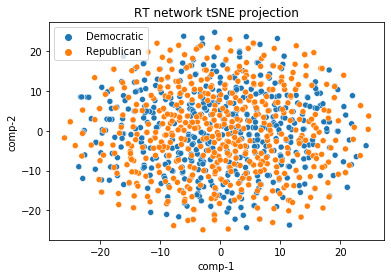

In [13]:
export_tSNE(df,str(num)+topic)

In [14]:
df.loc[df['labels']==label1, 'labels']=1

df.loc[df['labels']==label2, 'labels']=0
df['labels']=df['labels'].apply('int32')

In [15]:
def split_data(_df):
    np.random.seed(42)
    msk = np.random.rand(len(_df)) < 0.8
    df_train = _df[msk]
    df_left = _df[~msk]
    np.random.seed(42)
    msk = np.random.rand(len(df_left)) < 0.5
    df_valid = df_left[msk]
    df_test = df_left[~msk]

    print(df.shape)
    print('train:',df_train.shape)
    print('validation',df_valid.shape)
    print('test',df_test.shape)

    # Get the lists of sentences and their labels.
    
    training_data = torch.from_numpy(df_train.iloc[:,0:300].to_numpy())
    validation_data = torch.from_numpy(df_valid.iloc[:,0:300].to_numpy())
    testing_data = torch.from_numpy(df_test.iloc[:,0:300].to_numpy())
    
    labels_train = torch.tensor(df_train['labels'].to_numpy())
    labels_valid = torch.tensor(df_valid['labels'].to_numpy())
    labels_test = torch.tensor(df_test['labels'].to_numpy()) 
    
    
    _train_dataset = TensorDataset(training_data, labels_train)
    _val_dataset =   TensorDataset(validation_data, labels_valid)
    _test_dataset =  TensorDataset(testing_data, labels_test)
    
    
    return _train_dataset, _val_dataset, _test_dataset #df_train, df_valid, df_test, labels_train, labels_valid, labels_test

In [16]:
train_dataset, val_dataset, test_dataset= split_data(df)

(1000, 301)
train: (801, 301)
validation (102, 301)
test (97, 301)


# Domain2Vec training

In [17]:
import wandb
class NetworkMLP(nn.Module):
    def __init__(self):
        super(NetworkMLP, self).__init__() 
        self.fc1 = nn.Linear(300, 150)
            
    def forward(self, X):
        z1 = self.fc1(X)
        return z1 

class JointModel(nn.Module):
    
    def __init__(self,hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        self.model_net = NetworkMLP()
        self.fc1 = nn.Linear(150*1, 600)
        self.fc2 = nn.Linear(600, output_dim) #original
        self.dropout = nn.Dropout(dropout)


    def forward(self, _net): 
        prediction= self.model_net(_net)
        
        #prediction_twtNews = self.model_twt(x_tNews)
       
        #concat_pred = torch.cat((prediction_RT, prediction_MT), 1)
        output = self.fc1(prediction)
        
        output = self.dropout(output) # add dropout
        output = self.fc2(F.relu(output)) #original
        #output = self.dropout(output)#add dropout
        #output = self.fc3(F.relu(output))
        return output
        
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    #rounded_preds = torch.round(torch.sigmoid(preds))
    #rounded_preds = torch.round(preds)
    correct = (preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    
    from sklearn.metrics import f1_score
    macro_f1 = f1_score(y.to("cpu"), preds.to("cpu"), average='macro')
    #print("macro_f1", macro_f1)

    return acc, macro_f1


def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    epoch_macro = 0
    model.train()
    for step, batch in enumerate(iterator):    
    #for batch in iterator:
        #print("batch", batch)
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        #   b_input_ids = batch[0].to(device)
        #   b_input_mask = batch[1].to(device)
        #   b_labels = batch[2].to(device)

        optimizer.zero_grad()
        
        net = batch[0].to(device)
        #netMT = batch[1].to(device)
        #feature1=batch[0]
        #print('feature1:',feature1)
        #feature2=batch[1]
        #cosine_score=emb_similarity(feature1, feature2)
        #cosine_score_view=cosine_score.view(cosine_score.size()[0],1)

        #twt = batch[0].to(device)
        #news= batch[1].to(device)

        #print('text.size:',twt.size())
        #print('news.size:',news.size())

        #cosine_similarity=cosine_similarity.to(device)
        label = batch[1].to(device)

        #print("label", label, type(label),label.size()) #torch.Size([32])
        #label = label.unsqueeze(1)
        #print("label", label, type(label),label.size())
        #predictions = model(batch.text).squeeze(1)
        #predictions = model(text)
        predictions = model(net)#,cosine_similarity)

        #cosine_score_view=cosine_score.view(cosine_score.size()[0],1)



        #print('cosine_similarity.size:',cosine_score.size())
        #predictions=torch.cat((predictions,cosine_score_view), dim = 1)
        #print('predictions.size:',predictions.size())
        label = label.type(torch.LongTensor)

        
        loss = criterion(predictions, label)
    
        acc, macro_f1 = binary_accuracy(torch.argmax(predictions, dim = 1), label)

        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        epoch_macro += macro_f1.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_macro / len(iterator)

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    epoch_macro = 0
    model.eval()
    
    with torch.no_grad():
    
        #for batch in iterator:
        for step, batch in enumerate(iterator):    
            #des = batch[0].to(device)
            #loc = batch[1].to(device)
            net = batch[0].to(device)
            #netMT = batch[1].to(device)
            #twt = batch[0].to(device)
            #news= batch[1].to(devifce)
            label = batch[1].to(device)
            #predictions = model(batch.text).squeeze(1)
            label = label.type(torch.LongTensor)
            predictions = model(net)
            #loss = criterion(predictions, batch.label)
            loss = criterion(predictions, label)
            #acc = binary_accuracy(predictions, batch.label)
            acc, macro_f1 = binary_accuracy(torch.argmax(predictions, dim = 1), label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
            epoch_macro += macro_f1.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_macro / len(iterator)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

def save_plots(train_losses, val_losses, train_f1, val_f1, train_accs, val_accs,test_accs,test_f1s):
    """Plot

        Plot two figures: loss vs. epoch and accuracy vs. epoch
    """
    n = len(train_losses)
    xs = np.arange(1,n+1,1)
    xs = xs.astype(int)

    # plot train and val losses
    fig, ax = plt.subplots()
    ax.plot(xs, train_losses, '--', linewidth=2, label='train loss')
    ax.plot(xs, val_losses, '-', linewidth=2, label='validation loss')
    #ax.set_xlim(0, 10)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend(loc='upper right')
    plt.savefig('../Project2/'+topic+'/figs/'+savingname+'_Loss.png')

    # plot train and val f1-score
    #plt.clf()
    fig, ax = plt.subplots()
    ax.plot(xs, train_f1, '--', linewidth=2, label='train')
    ax.plot(xs, val_f1, '-', linewidth=2, label='validation')
    ax.plot(xs, test_f1s, '-', linewidth=2, label='test')
    
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Macro-avg F1")
    ax.legend(loc='lower right')
    plt.savefig('../Project2/'+topic+'/figs/'+savingname+'_Macro-avgF1.png')
    
    # plot train and val accuracy
    #plt.clf()
    fig, ax = plt.subplots()
    ax.plot(xs, train_accs, '--', linewidth=2, label='train')
    ax.plot(xs, val_accs, '-', linewidth=2, label='validation')
    ax.plot(xs, test_accs, '-', linewidth=2, label='test')
    #ax.set_xlim(0, 10)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")
    ax.legend(loc='lower right')
    plt.savefig('../Project2/'+topic+'/figs/'+savingname+'_ACC.png')


In [18]:
smaller_sample = 500
batch_size = 16
savingname=topic+'_RT_500:500'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Training')
print('Device:',device)
which_time = 0
N_EPOCHS = 10
HIDDEN_DIM = 300 
OUTPUT_DIM = 3
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5 

Training
Device: cpu


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: lawrencexu (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.13 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


  0%|          | 0/10 [00:00<?, ?it/s]

0


 10%|█         | 1/10 [00:00<00:02,  4.20it/s]

best model saved in epoch : 1
Epoch: 01 | Epoch Time: 0m 0s
	Train Loss: 0.806 | Train Acc: 49.51 | Train macro-avg-f1: 41.14%
	 Val. Loss: 0.697 |  Val. Acc: 50.00 |  Val. macro-avg-f1: 47.62%
	 Aver. ACC: 50.00%
1


 20%|██        | 2/10 [00:00<00:01,  4.15it/s]

Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 0.703 | Train Acc: 49.63 | Train macro-avg-f1: 42.15%
	 Val. Loss: 0.703 |  Val. Acc: 50.00 |  Val. macro-avg-f1: 47.62%
	 Aver. ACC: 50.00%
2


 40%|████      | 4/10 [00:00<00:01,  4.52it/s]

Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 0.708 | Train Acc: 47.67 | Train macro-avg-f1: 41.31%
	 Val. Loss: 0.697 |  Val. Acc: 50.00 |  Val. macro-avg-f1: 47.62%
	 Aver. ACC: 50.00%
3
Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 0.705 | Train Acc: 48.90 | Train macro-avg-f1: 41.85%
	 Val. Loss: 0.699 |  Val. Acc: 50.00 |  Val. macro-avg-f1: 47.62%
	 Aver. ACC: 50.00%
4


 50%|█████     | 5/10 [00:01<00:01,  4.52it/s]

best model saved in epoch : 5
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 0.701 | Train Acc: 48.04 | Train macro-avg-f1: 41.30%
	 Val. Loss: 0.694 |  Val. Acc: 50.00 |  Val. macro-avg-f1: 47.62%
	 Aver. ACC: 50.00%
5


 60%|██████    | 6/10 [00:01<00:00,  4.45it/s]

Epoch: 06 | Epoch Time: 0m 0s
	Train Loss: 0.703 | Train Acc: 47.67 | Train macro-avg-f1: 44.11%
	 Val. Loss: 0.695 |  Val. Acc: 50.00 |  Val. macro-avg-f1: 47.62%
	 Aver. ACC: 50.00%
6


 70%|███████   | 7/10 [00:01<00:00,  4.38it/s]

Epoch: 07 | Epoch Time: 0m 0s
	Train Loss: 0.698 | Train Acc: 52.08 | Train macro-avg-f1: 42.48%
	 Val. Loss: 0.704 |  Val. Acc: 50.00 |  Val. macro-avg-f1: 47.62%
	 Aver. ACC: 50.00%
7


 80%|████████  | 8/10 [00:01<00:00,  4.35it/s]

Epoch: 08 | Epoch Time: 0m 0s
	Train Loss: 0.700 | Train Acc: 49.75 | Train macro-avg-f1: 40.47%
	 Val. Loss: 0.700 |  Val. Acc: 50.00 |  Val. macro-avg-f1: 47.62%
	 Aver. ACC: 50.00%
8


 90%|█████████ | 9/10 [00:02<00:00,  4.24it/s]

Epoch: 09 | Epoch Time: 0m 0s
	Train Loss: 0.697 | Train Acc: 51.72 | Train macro-avg-f1: 45.01%
	 Val. Loss: 0.697 |  Val. Acc: 50.00 |  Val. macro-avg-f1: 47.62%
	 Aver. ACC: 50.00%
9


100%|██████████| 10/10 [00:02<00:00,  4.35it/s]

Epoch: 10 | Epoch Time: 0m 0s
	Train Loss: 0.703 | Train Acc: 48.16 | Train macro-avg-f1: 41.54%
	 Val. Loss: 0.695 |  Val. Acc: 50.00 |  Val. macro-avg-f1: 47.62%
	 Aver. ACC: 50.00%
Test Loss: 0.694 | Test Acc: 55.36 | Test macro-avg-f1: 49.52%
	 Aver. TEST ACC: 55.36%
Test Loss: 0.717 | Test Acc: 44.64 | Test macro-avg-f1: 44.44%
	 Aver. TEST ACC: 50.00%
Test Loss: 0.690 | Test Acc: 55.36 | Test macro-avg-f1: 49.52%
	 Aver. TEST ACC: 51.79%
Test Loss: 0.689 | Test Acc: 55.36 | Test macro-avg-f1: 49.52%
	 Aver. TEST ACC: 52.68%
Test Loss: 0.692 | Test Acc: 55.36 | Test macro-avg-f1: 49.52%
	 Aver. TEST ACC: 53.21%
Test Loss: 0.691 | Test Acc: 55.36 | Test macro-avg-f1: 49.52%
	 Aver. TEST ACC: 53.57%
Test Loss: 0.689 | Test Acc: 55.36 | Test macro-avg-f1: 49.52%
	 Aver. TEST ACC: 53.83%
Test Loss: 0.688 | Test Acc: 55.36 | Test macro-avg-f1: 49.52%
	 Aver. TEST ACC: 54.02%
Test Loss: 0.688 | Test Acc: 55.36 | Test macro-avg-f1: 49.52%
	 Aver. TEST ACC: 54.17%
Test Loss: 0.691 | Test 

Average TEST Acc,█▁▃▅▅▆▆▆▆▇
Average Val. Acc,▁▁▁▁▁▁▁▁▁▁
Max TEST Acc,▁▁▁▁▁▁▁▁▁▁
Max Val Acc,▁▁▁▁▁▁▁▁▁▁
Test accuracy,█▁████████
Test loss,▂█▂▁▂▂▁▁▁▂
Test macro-avg-f1,█▁▃▅▅▆▆▆▆▇
Val. accuracy,▁▁▁▁▁▁▁▁▁▁
Val. loss,▃▇▃▅▁▁█▅▃▁
Val. macro-avg-f1,▁▁▁▁▁▁▁▁▁▁
Average TEST Acc,0.54286


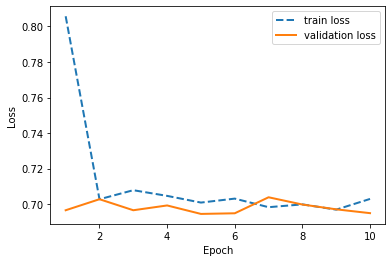

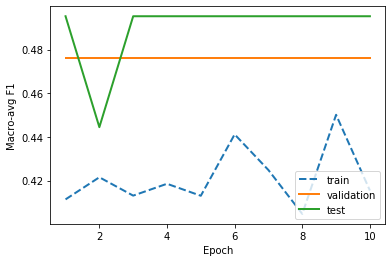

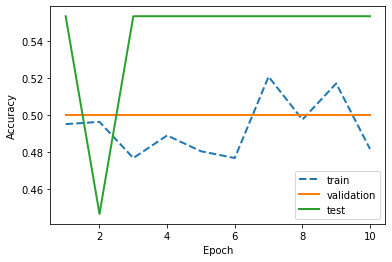

In [19]:
train_dataloader = DataLoader(
                    train_dataset,  # The training samples.
                    sampler = RandomSampler(train_dataset), # Select batches randomly
                    batch_size = batch_size # Trains with this batch size.
                )
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
test_dataloader = DataLoader(
            test_dataset, # The validation samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        ) 

model = JointModel(HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL,DROPOUT)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device) 
wandb.login()
wandb.init(project='Project2_joint',name=savingname)#wandb.init(project='Project2_joint',name=savingname+'_'+str(eachtime))
wandb.config = {
        "epochs": N_EPOCHS,
        "batch_size": batch_size
        }

resume_training = False
if resume_training == True:
    eachtime = 0
    which_time = 6
    path= '../Project2/pt/'+savingname+'_'+str(eachtime)+'/'
    checkpoint = torch.load(path+str(which_time)+'.pt')
    model.load_state_dict(checkpoint)
model = model.to(device)





pt=makefolder('../Project2/pt/'+savingname+'/')#pt=makefolder('../Project2/pt/'+savingname+'_'+str(eachtime)+'/')
pt_best=makefolder('../Project2/pt_best/'+savingname+'/')#pt_best=makefolder('../Project2/pt_best/'+savingname+'_'+str(eachtime)+'/')


best_valid_loss = float('inf')
per_epoch_train_loss = []
per_epoch_val_loss = []
per_epoch_train_f1 = []
per_epoch_val_f1 = []
per_epoch_train_acc = []
per_epoch_val_acc = []
import time
t1=time.time()
for epoch in tqdm(range(which_time, N_EPOCHS)):
    print(epoch)

    start_time = time.time()

    train_loss, train_acc, train_f1 = train(model, train_dataloader, optimizer, criterion)
    valid_loss, valid_acc, valid_f1 = evaluate(model, validation_dataloader, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    per_epoch_train_loss.append(train_loss)
    per_epoch_val_loss.append(valid_loss)
    per_epoch_train_f1.append(train_f1)
    per_epoch_val_f1.append(valid_f1)
    per_epoch_train_acc.append(train_acc)
    per_epoch_val_acc.append(valid_acc)
    Val_aver_acc=mean(per_epoch_val_acc)
    Val_aver_f1=mean(per_epoch_val_f1)


    if valid_loss <= best_valid_loss:
        best_valid_loss = valid_loss
        print("best model saved in epoch :", epoch+1 )
        torch.save(model.state_dict(), pt_best +str(epoch+1)+'.pt')
    torch.save(model.state_dict(), pt +'/'+str(epoch+1)+'.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f} | Train macro-avg-f1: {train_f1*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f} |  Val. macro-avg-f1: {valid_f1*100:.2f}%')
    print(f'\t Aver. ACC: {Val_aver_acc*100:.2f}%')
    wandb.log({'Max Val Acc':max(per_epoch_val_acc),'Average Val. Acc': Val_aver_acc,'Val. accuracy': valid_acc, 'Val. loss': valid_loss,'Val. macro-avg-f1':valid_f1})


Test_Acc = []
Test_f1=[]
for epoch in range(N_EPOCHS):
    model.load_state_dict(torch.load(pt+str(epoch+1)+'.pt')) 
    test_loss, test_acc, test_f1 = evaluate(model, test_dataloader, criterion)

    Test_Acc.append(test_acc)
    Test_f1.append(test_f1)
    Test_aver_acc=mean(Test_Acc)
    Test_test_f1=mean(Test_f1)
    t2=time.time()
    
    print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f} | Test macro-avg-f1: {test_f1*100:.2f}%')
    print(f'\t Aver. TEST ACC: {Test_aver_acc*100:.2f}%')
    wandb.log({'Max TEST Acc':max(Test_Acc),'Average TEST Acc': Test_aver_acc,'Test accuracy': test_acc, 'Test loss': test_loss,'Test macro-avg-f1':Test_test_f1})
_time=t2-t1
wandb.finish()
save_plots(per_epoch_train_loss, per_epoch_val_loss, per_epoch_train_f1, 
per_epoch_val_f1, per_epoch_train_acc, per_epoch_val_acc,Test_Acc,Test_f1)


In [20]:
re=pd.DataFrame([[Val_aver_acc,Test_aver_acc, Val_aver_f1,Test_test_f1,_time]],columns=['Avg. Val. Acc.','Avg. Test.Acc','Avg. Val. macro-avg-f1','Avg. Test. macro-avg-f1','Time'])
re.to_csv('../Project2/'+topic+'/RT_classification_results.csv',index=None)

In [21]:
re

,Avg. Val. Acc.,Avg. Test.Acc,Avg. Val. macro-avg-f1,Avg. Test. macro-avg-f1,Time
0,0.5,0.542857,0.47619,0.490159,2.478457


# check domain label

In [40]:
biden_co_occur_df=pd.read_csv('../Project2/biden/biden_co_occur.csv')
nodes1=pd.read_csv('../Project2/domain/data.csv')['Domain'].tolist()
nodes2=pd.read_csv('../Project2/domain/cre.csv')['domain'].tolist()

In [42]:
biden_co_occur_df.loc[biden_co_occur_df['Id'].isin(nodes1),'flag']='non-credible'

In [43]:
biden_co_occur_df.loc[biden_co_occur_df['Id'].isin(nodes2),'flag']='credible'

In [49]:
biden_co_occur_df[biden_co_occur_df['modularity_class']==0].groupby('flag').size()

flag
credible        208
non-credible      1
dtype: int64

In [58]:
(208+1)/(208-1)

1.0096618357487923

In [55]:
import numpy as np
biden_co_occur_df[biden_co_occur_df['modularity_class']==0].isna().sum()

Id                    0
Label                 0
timeset             499
modularity_class      0
degree                0
flag                290
dtype: int64

In [50]:
biden_co_occur_df[biden_co_occur_df['modularity_class']==1].groupby('flag').size()

flag
credible        64
non-credible    46
dtype: int64

In [57]:
import numpy as np
biden_co_occur_df[biden_co_occur_df['modularity_class']==1].isna().sum()

282


Id                    0
Label                 0
timeset             282
modularity_class      0
degree                0
flag                172
dtype: int64

In [59]:
(64+46)/(64-46)

6.111111111111111

In [1]:
import pandas
dfn1=pd.DataFrame(nodes1)
dfn1.columns=['user_screen_name']
dfn1['label']='pro-QAnon'

dfn2=pd.DataFrame(nodes2)
dfn2.columns=['user_screen_name']
dfn2['label']='anti-QAnon'

dfn=pd.concat([dfn1,dfn2])

NameError: name 'pd' is not defined

In [259]:
dfn.to_csv('../Project2/domain/user_label.csv',index=None)

In [273]:
K=nx.read_gexf('../Project2/domain/domain.gexf')

In [274]:
kdf=nx.to_pandas_edgelist(K,'source','target')

In [284]:
nodes1=pd.read_csv('../Project2/domain/data.csv')['Domain'].tolist()
nodes2=pd.read_csv('../Project2/domain/cre.csv')['domain'].tolist()

In [285]:
kdf.loc[kdf['source'].isin(nodes1),'Flag']='pro-QAnon'

In [286]:
kdf.loc[kdf['source'].isin(nodes2),'Flag']='anti-QAnon'

In [287]:
kdf.to_csv('../Project2/domain/edge_list.csv',index=None)

In [232]:
nx.write_gexf(G,'../Project2/domains.gexf')

In [ ]:

_K=nx.from_pandas_edgelist(_hadf,0,1)

In [163]:
ndf0['urls'].drop_duplicates().shape

(21,)

In [177]:
# accuracy goodbots
n1=df2['user_screen_name'].shape[0]
temp = mdf[mdf['class'] == 'center users']
n2=temp[temp['users'].isin(df2['user_screen_name'])].shape[0]
n2/n1

0.648

In [178]:
n2

324

In [179]:
gf

,urls,user_screen_name,tweet_id,created_at,text,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,latitude,longitude,...,lang,resolved_domain,resolved_url,news,cap.english,display_scores.english.overall,modularity_class,indegree,outdegree,degree
0,NaN,leahbirdjohnso2,1230285097896677377,2020-02-20 09:16:39,rt @golfingjohn_: get the popcorn ready! the c...,NaN,NaN,NaN,NaN,NaN,...,en,NaN,NaN,NaN,NaN,NaN,0,0,3,3
1,NaN,GolfingJohn_,1230287431636848640,2020-02-20 09:25:55,rt @golfingjohn_: get the popcorn ready! the c...,NaN,NaN,NaN,NaN,NaN,...,en,NaN,NaN,NaN,NaN,NaN,0,48,7,55
2,NaN,SoHappy33,1230288536588496896,2020-02-20 09:30:19,rt @golfingjohn_: get the popcorn ready! the c...,NaN,NaN,NaN,NaN,NaN,...,en,NaN,NaN,NaN,0.787400,1.7,0,0,2,2
3,NaN,Bigbillshater,1230289861564882944,2020-02-20 09:35:35,rt @1love_america: get the popcorn ready! the ...,NaN,NaN,NaN,NaN,NaN,...,en,NaN,NaN,NaN,NaN,NaN,0,0,5,5
4,NaN,cinspy6,1230294587605946375,2020-02-20 09:54:22,rt @1love_america: get the popcorn ready! the ...,NaN,NaN,NaN,NaN,NaN,...,en,NaN,NaN,NaN,NaN,NaN,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316830,https://youtu.be/v2naoIVtEHc',scampbell123451,1263121624057995265,2020-05-20 23:57:17,rt @scampbell123451: recent videos: deep state...,NaN,NaN,NaN,NaN,NaN,...,en,youtube.com,https://www.youtube.com/watch?v=v2naoIVtEHc%27...,NaN,0.779582,1.6,0,9,2,11
316831,'https://youtu.be/JFxYgPlsLbI',scampbell123451,1263121624057995265,2020-05-20 23:57:17,rt @scampbell123451: recent videos: deep state...,NaN,NaN,NaN,NaN,NaN,...,en,youtube.com,https://www.youtube.com/watch?v=v2naoIVtEHc%27...,NaN,0.779582,1.6,0,9,2,11
316832,'https://youtu.be/lAbKoxYVXPI,scampbell123451,1263121624057995265,2020-05-20 23:57:17,rt @scampbell123451: recent videos: deep state...,NaN,NaN,NaN,NaN,NaN,...,en,youtube.com,https://www.youtube.com/watch?v=v2naoIVtEHc%27...,NaN,0.779582,1.6,0,9,2,11
316833,https://www.bitchute.com/video/HeC0tHZDX7dk/?f...,michae1c1,1288640359220772865,2020-07-30 09:59:38,rt @jjppatriot: fauci and the deep state big ...,NaN,NaN,NaN,NaN,NaN,...,en,bitchute.com,https://www.bitchute.com/video/HeC0tHZDX7dk/?f...,Reason\n\nSelect reason Abhorrent Violence Ani...,NaN,NaN,0,0,2,2


In [173]:
import speedtest
import datetime
import csv
import time
import logging
try:
    s = speedtest.Speedtest()

    with open('test.csv', mode='w') as speedcsv:
        csv_writer = csv.DictWriter(speedcsv, fieldnames=['time', 'downspeed', 'upspeed'])
        csv_writer.writeheader()
        while True:
            time_now = datetime.datetime.now().strftime("%H:%M:%S")
            downspeed = round((round(s.download()) / 1048576), 2)
            upspeed = round((round(s.upload()) / 1048576), 2)
            csv_writer.writerow({
                'time': time_now,
                'downspeed': downspeed,
                "upspeed": upspeed
            })
            # 60 seconds sleep
            time.sleep(60)
except Exception as e:
            logging.error('Exception raised.')
            logging.error(e)

KeyboardInterrupt: 

In [28]:
text='http://google&p'

'google' & 'amp' in text

TypeError: unsupported operand type(s) for &: 'str' and 'str'